## Airbnb Listing Analysis Project



### Aim


The aim of this project is to analyze Airbnb listings in Paris to understand the impact of regulations introduced in 2015 on the market. The focus is on identifying factors that affect pricing and examining how these regulations have influenced the number of new hosts over time. The project involves data profiling, quality assurance, data preparation, and visualization to generate actionable insights and recommendations for Airbnb's leadership.





### Data Used


- **Dataset**: Airbnb Listings (CSV file)


- **Key Columns**:


  - `host_since`: The date when the host started listing on Airbnb.
  - `neighbourhood`: The neighborhood where the listing is located.
  - `city`: The city of the listing (filtered to Paris).
  - `accommodates`: The number of guests the listing can accommodate.
  - `price`: The price per night for the listing.
  
  
- **Focus**: Analysis is specifically focused on listings in Paris.





### Techniques Used


- **Data Cleaning and Preparation**:


  - Casting date columns to `datetime` format.
  - Filtering the dataset to include only Paris listings.
  - Addressing missing values and calculating basic statistics (min, max, average).


- **Data Aggregation and Grouping**:


  - Grouping listings by `neighbourhood` and `accommodates`.
  - Calculating the mean price for each group.
  - Aggregating data by year (`host_since`) to analyze trends over time.
  

- **Visualization Techniques**:


  - Creating horizontal bar charts to visualize average prices by neighborhood and by the number of accommodations.
  - Developing line charts to display the count of new hosts and average price trends over time.
  - Using dual-axis line charts to simultaneously analyze the number of new hosts and average prices.
  
  

**Imported the necessary libraries anticipated for use in this analysis, including pandas for data manipulation and visualization libraries such as Matplotlib and Seaborn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exploring the DataFrame Properties**

In [2]:
df = pd.read_csv('D:\Airbnb+Data\Airbnb Data\Listings.csv', low_memory=False, encoding="ISO-8859-1")

In [8]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
from datetime import datetime

In [6]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [11]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [12]:
df.iloc[0]['host_since']|

Timestamp('2011-12-03 00:00:00')

In [7]:
type(df.iloc[0]['host_since'])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
listings = pd.read_csv('D:\Airbnb+Data\Airbnb Data\Listings.csv', low_memory=False, encoding="ISO-8859-1", parse_dates=[3] )

In [10]:
listings

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [9]:
type(listings['host_since'])

pandas.core.series.Series

In [10]:
type(listings.iloc[0]['host_since'])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
paris_listings = listings['city'] == 'Paris'

In [22]:
paris_listings

0         True
1         True
2         True
3         True
4         True
          ... 
279707    True
279708    True
279709    True
279710    True
279711    True
Name: city, Length: 279712, dtype: bool

In [12]:
paris_listing = listings[paris_listings]

In [13]:
paris_listing

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [14]:
paris_listing[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [15]:
filtered_data = paris_listing[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [16]:
filtered_data

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [17]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [18]:
filtered_data.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [32]:
paris_listings_neighbourhood = filtered_data[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values('price')
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [54]:
paris_listings_accomodations = filtered_data.query("neighbourhood == 'Elysee'").groupby('accommodates').mean().sort_values('price')
paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [41]:
paris_listings_overtime = filtered_data.set_index('host_since').resample('Y').agg({'neighbourhood': 'count', 'price':'mean'})
paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


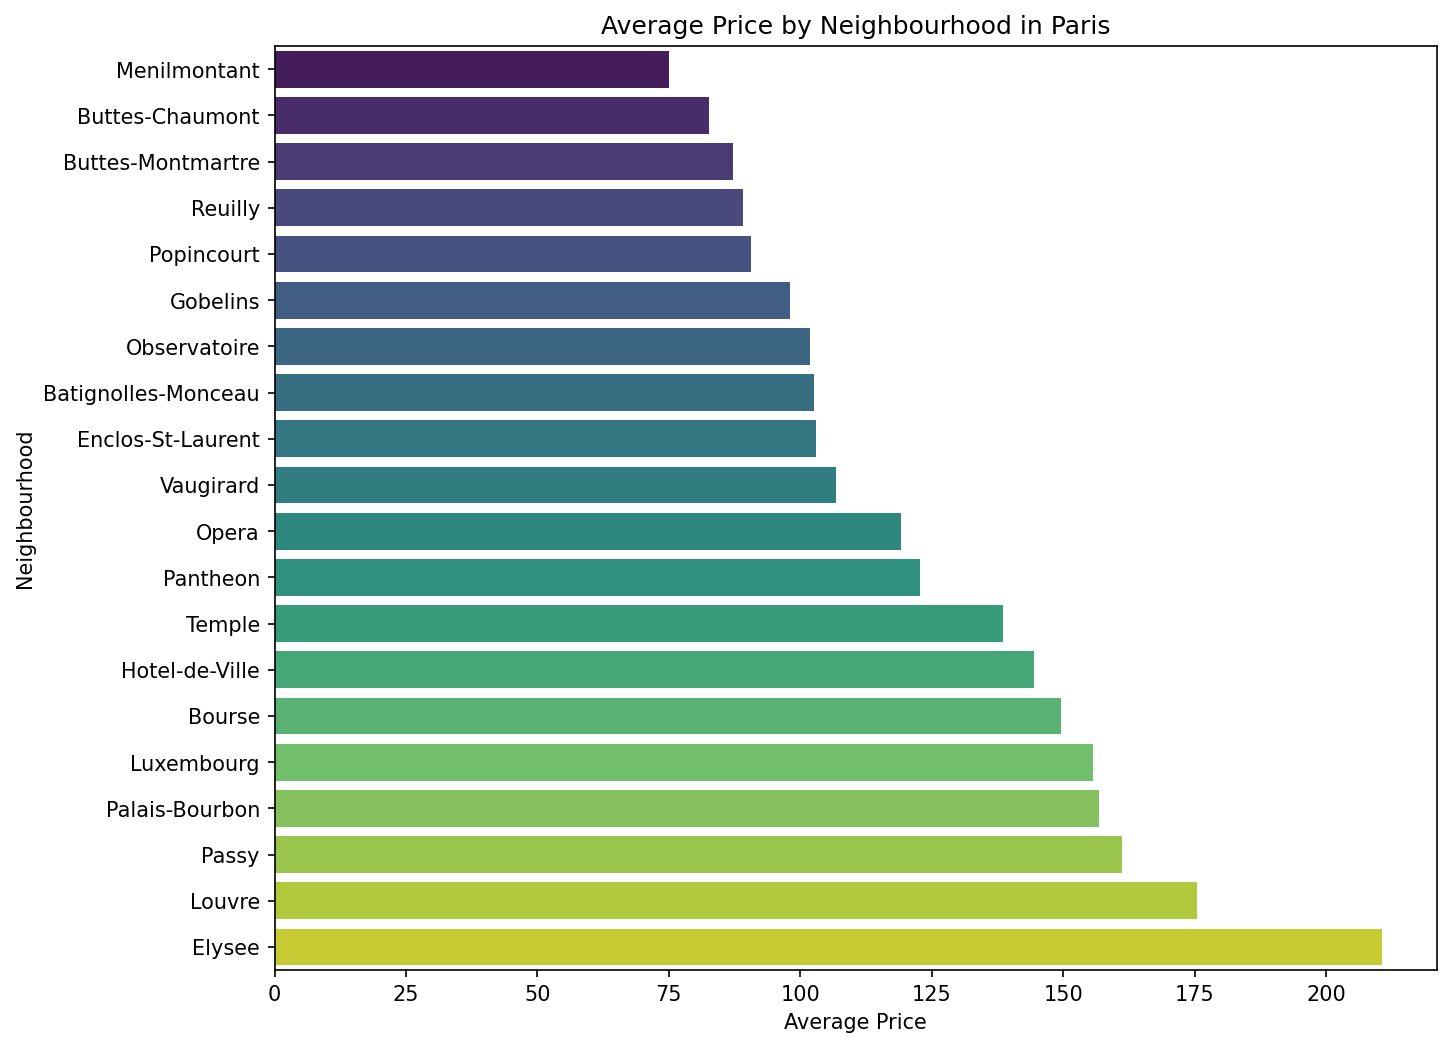

In [86]:
paris_listings_neighbourhood = paris_listings_neighbourhood.reset_index()

plt.figure(figsize = (10,8), dpi = 150)
sns.barplot(data=paris_listings_neighbourhood, x = 'price', y = 'neighbourhood', palette ='viridis')
plt.title('Average Price by Neighbourhood in Paris')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')

plt.show()

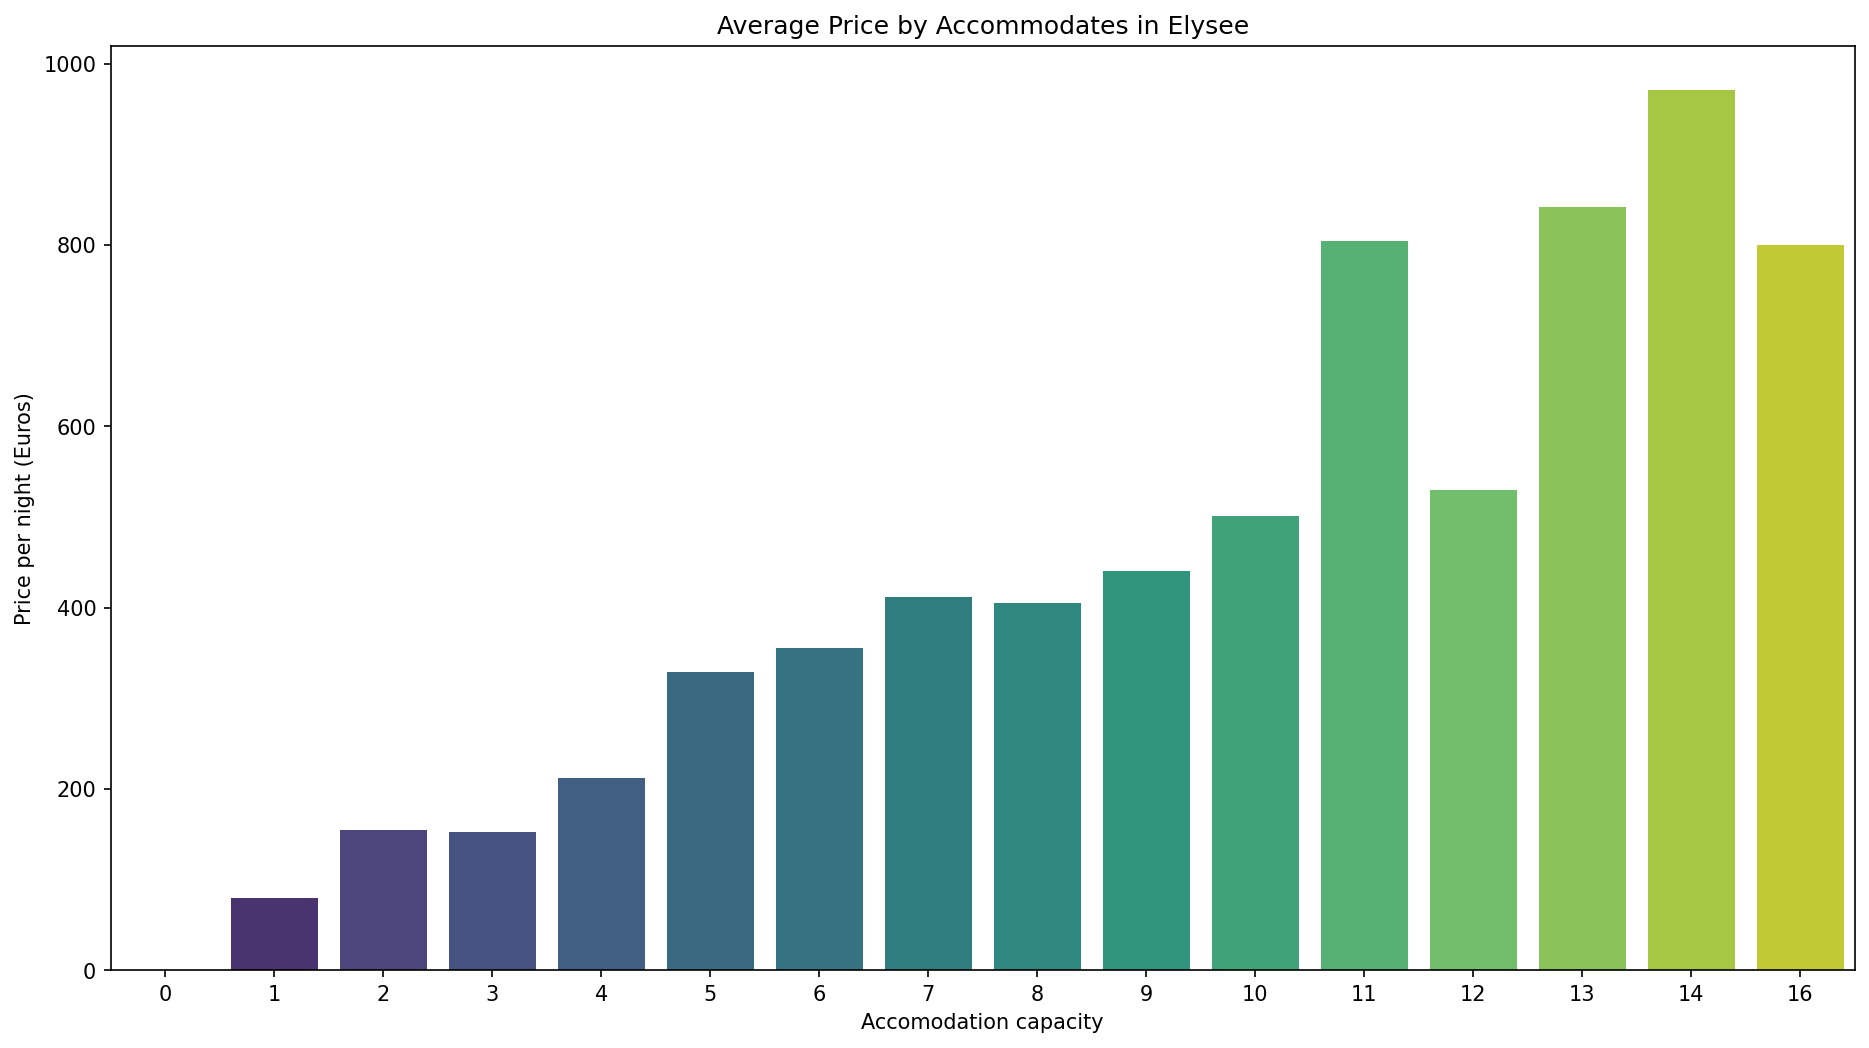

In [84]:
if 'level_0' in paris_listings_accomodations.columns:
    paris_listings_accomodations = paris_listings_accomodations.drop(columns=['level_0'])

paris_listings_accommodations = paris_listings_accomodations.reset_index()


plt.figure(figsize=(15,8), dpi=150)
sns.barplot( data = paris_listings_accommodations, x = 'accommodates', y ='price', palette='viridis')
plt.title('Average Price by Accommodates in Elysee')
plt.xlabel('Accomodation capacity')
plt.ylabel('Price per night (Euros)')

plt.show()

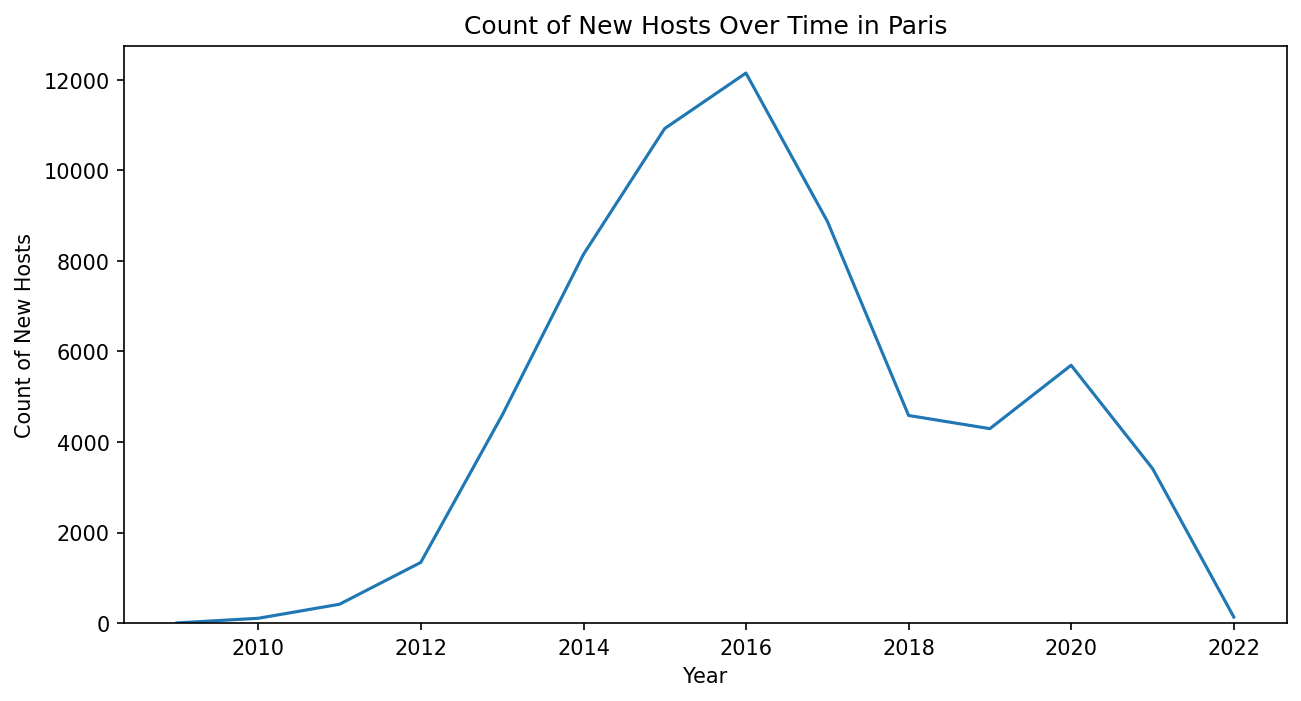

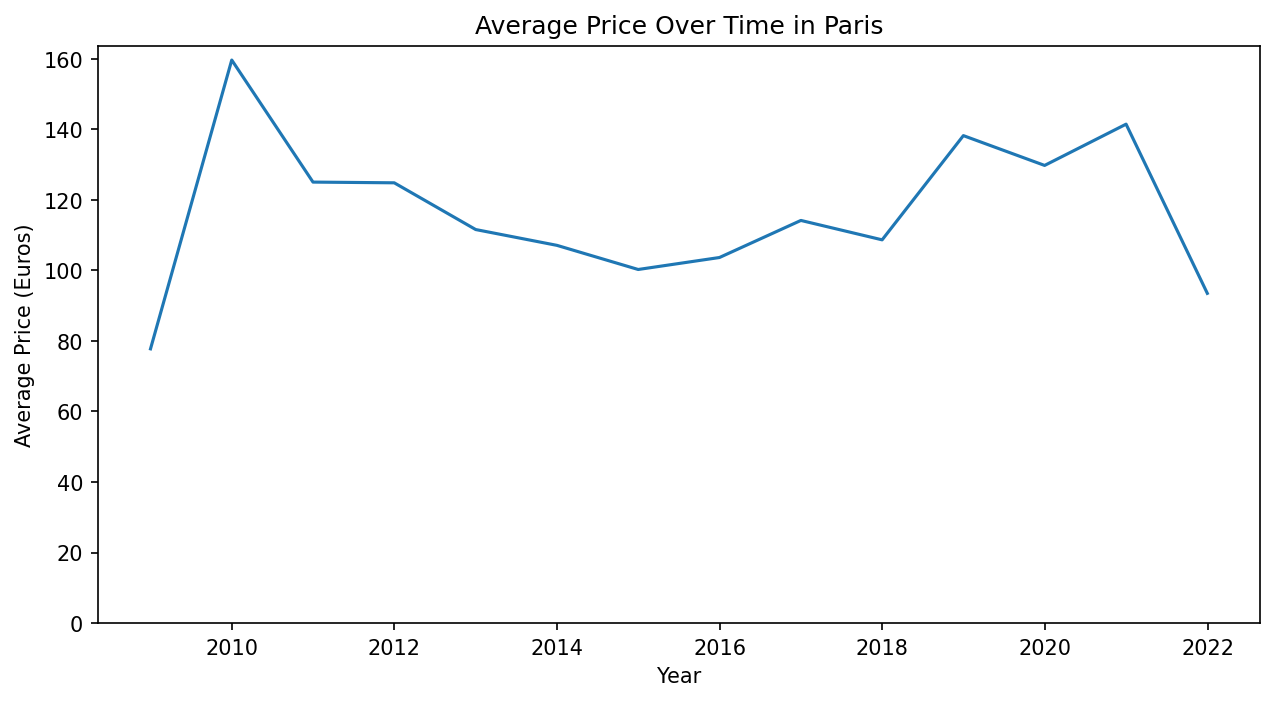

In [85]:
if 'level_0' in paris_listings_overtime.columns:
    paris_listings_overtime = paris_listings_overtime.drop(columns=['level_0'])

paris_listings_overtime = paris_listings_overtime.reset_index()


plt.figure(figsize=(10,5), dpi=150)
sns.lineplot( data=paris_listings_overtime, x = 'host_since', y = 'neighbourhood')
plt.ylim(0)
plt.title('Count of New Hosts Over Time in Paris')
plt.xlabel('Year')
plt.ylabel('Count of New Hosts')
plt.show()


plt.figure(figsize=(10,5), dpi=150)
sns.lineplot(data = paris_listings_overtime, x = 'host_since', y = 'price')
plt.ylim(0)
plt.title('Average Price Over Time in Paris')
plt.xlabel('Year')
plt.ylabel('Average Price (Euros)')
plt.show()

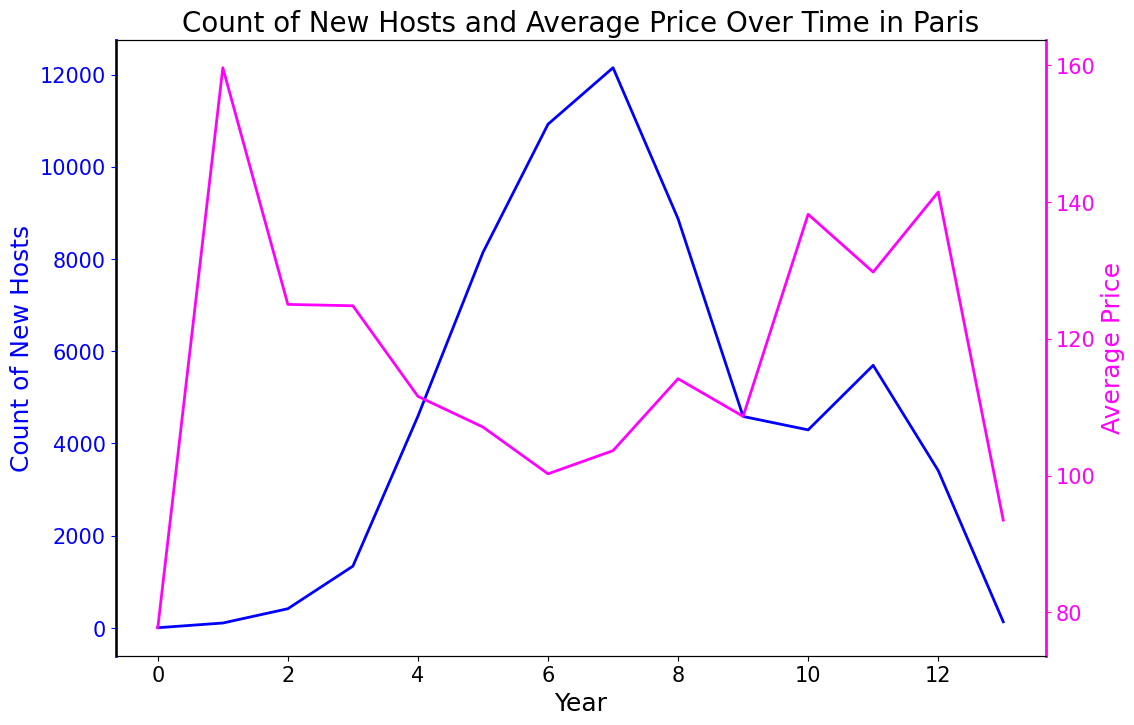

In [83]:
years = paris_listings_overtime.index
host_count = paris_listings_overtime['neighbourhood']
avg_price = paris_listings_overtime['price']


fig, ax1 = plt.subplots(figsize = (12,8))


ax1.plot(years, host_count, lw =2, color= "blue")
ax1.set_ylabel("Count of New Hosts", fontsize =18, color = "blue")


ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis = 'y', colors = 'blue')


ax2 = ax1.twinx()
ax2.plot(years, avg_price, lw = 2, color = "magenta")
ax2.set_ylabel("Average Price", fontsize = 18, color ="magenta")


ax2.spines['right'].set_color('magenta')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis = 'y', colors = 'magenta')


ax1.set_title("Count of New Hosts and Average Price Over Time in Paris", fontsize = 20)
ax1.set_xlabel("Year", fontsize = 18)


ax1.tick_params(axis = 'x', labelsize = 15)
ax1.tick_params(axis = 'y', labelsize = 15)
ax2.tick_params(axis = 'y', labelsize = 15)

plt.show()

## Key Findings and Impact




- **Neighborhood Price Discrepancies**:
  - **Most Expensive**: Élysées and Louvre  with significantly higher average prices.
  - **Most Affordable**:Menilmontant and Buttes-Chaumont, offering the lowest average prices.
  
  

- **Growth of New Hosts**:
  - Initial surge in new hosts with around 12,000 joining during the peak growth period.
  - The introduction of regulations in 2015 led to a sharp decline in new hosts entering the market.
  
  
  

- **Regulatory Impact**:
  - Paris regulations aimed to address rising housing costs and community disruption.
  - The number of new hosts declined significantly after the regulations were enforced, indicating the effectiveness of these       measures.




- **Price Trends**:
  - **Pre-Regulation**: Prices declined as competition among hosts increased with the influx of new hosts.
  - **Post-Regulation**: Prices began to rise again as fewer new hosts entered the market, reducing competition.
  - **COVID-19 Impact**: The pandemic caused a decline in both demand and prices due to lockdowns and travel restrictions.




- **Overall Impact**:
  - Regulations reshaped the market by slowing down host growth and stabilizing prices.
  - The reduction in competition post-regulation allowed existing hosts to command higher prices, benefiting from a less crowded     market.